In [1]:
import os
import scanpy as sc
import pandas as pd
import numpy as np
from tqdm import tqdm
import tables

import celltypist
from celltypist import models

import muon as mu
from muon import MuData

#os.chdir('/lustre/scratch117/cellgen/team205/cs42/VDJ_collab_manuscript/')
sc.logging.print_header()

ModuleNotFoundError: No module named 'tables'

In [2]:
import dandelion as ddl
ddl.logging.print_header()

dandelion==0.5.5 pandas==2.2.3 numpy==2.1.3 matplotlib==3.10.3 networkx==3.4.2 scipy==1.15.2


/home/jovyan/my-conda-envs/new2025/lib/python3.10/site-packages/nxviz/__init__.py:33: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)



In [2]:
#import dandelion as ddl
#ddl.logging.print_header()

dandelion==0.3.2 pandas==1.4.4 numpy==1.23.4 matplotlib==3.6.2 networkx==2.8.8 scipy==1.9.3


In [3]:
print(ddl.__version__)

0.5.5


In [3]:
trab_adata = sc.read_h5ad('/lustre/scratch126/cellgen/teichmann/rl20/TCL/object/Subset_Tcell_final_soupX_processed_noBatchC_dandelion.1.h5ad')
trab_adata

AnnData object with n_obs × n_vars = 123194 × 3389
    obs: 'ID', 'sample_id', 'donor_id', 'tumour_type', 'age', 'site', 'type', 'mad_prd', 'ds', 'mad_MED', 'mad_MAD', 'mad_thr', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_0.8', 'leiden_1.0', 'leiden_1.0_c14', 'leiden_1.0_c14_C15', 'broad_cell_type', 'leiden_0.8_c22', 'leiden_0.8_c22_c3', 'malignant_call', 'malignant_call_donor', 'malignant_call_tumour_type', 'has_contig', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 

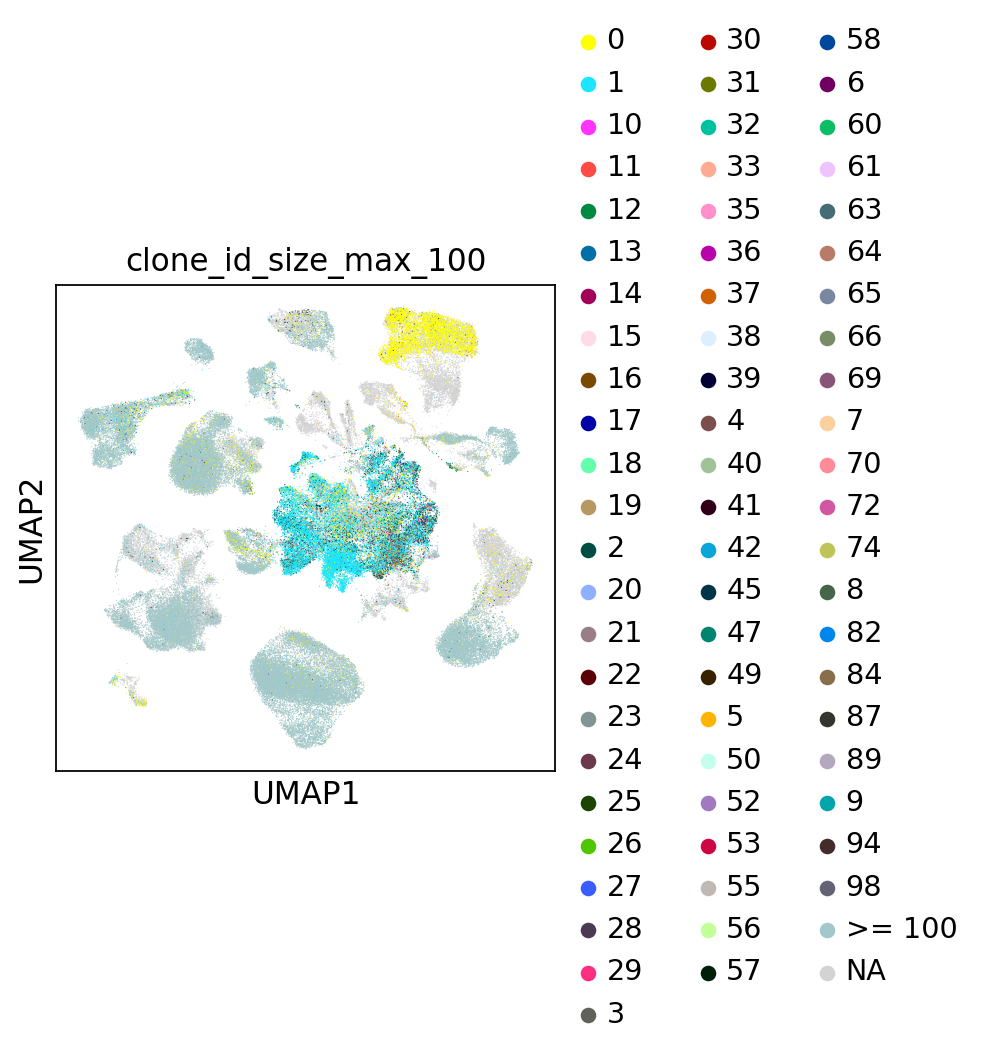

In [4]:
sc.settings.set_figure_params(dpi=80, facecolor='white')
sc.pl.umap(trab_adata, color='clone_id_size_max_100')

In [5]:
trab_adata.obs['clone_id_size_max_100_modi'] = trab_adata.obs['clone_id_size_max_100'].copy()
#### TCR of KLT is clonal, but only has alpha chain and the clonal size is assigned as 0
trab_adata.obs['clone_id_size_max_100_modi'] = trab_adata.obs['clone_id_size_max_100_modi'].replace('0', '>= 100') 

/tmp/ipykernel_8251/3741919623.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.


In [6]:
trab_adata

AnnData object with n_obs × n_vars = 123194 × 3389
    obs: 'ID', 'sample_id', 'donor_id', 'tumour_type', 'age', 'site', 'type', 'mad_prd', 'ds', 'mad_MED', 'mad_MAD', 'mad_thr', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_0.8', 'leiden_1.0', 'leiden_1.0_c14', 'leiden_1.0_c14_C15', 'broad_cell_type', 'leiden_0.8_c22', 'leiden_0.8_c22_c3', 'malignant_call', 'malignant_call_donor', 'malignant_call_tumour_type', 'has_contig', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 

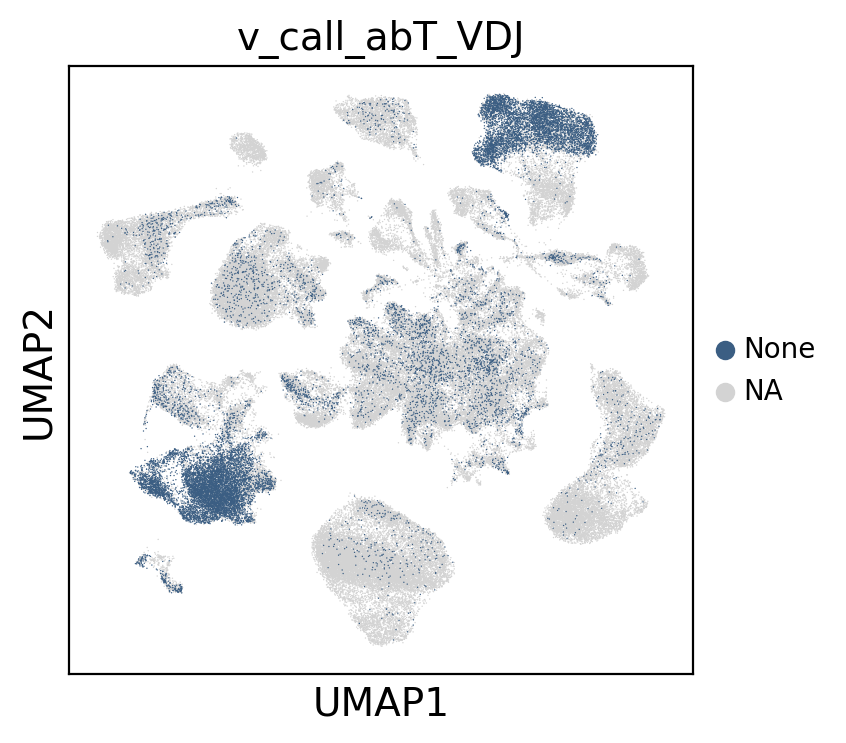

In [7]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.pl.umap(trab_adata, color=['v_call_abT_VDJ'], legend_fontsize=10, groups=['None'],palette = ['grey','#3B5E83'])

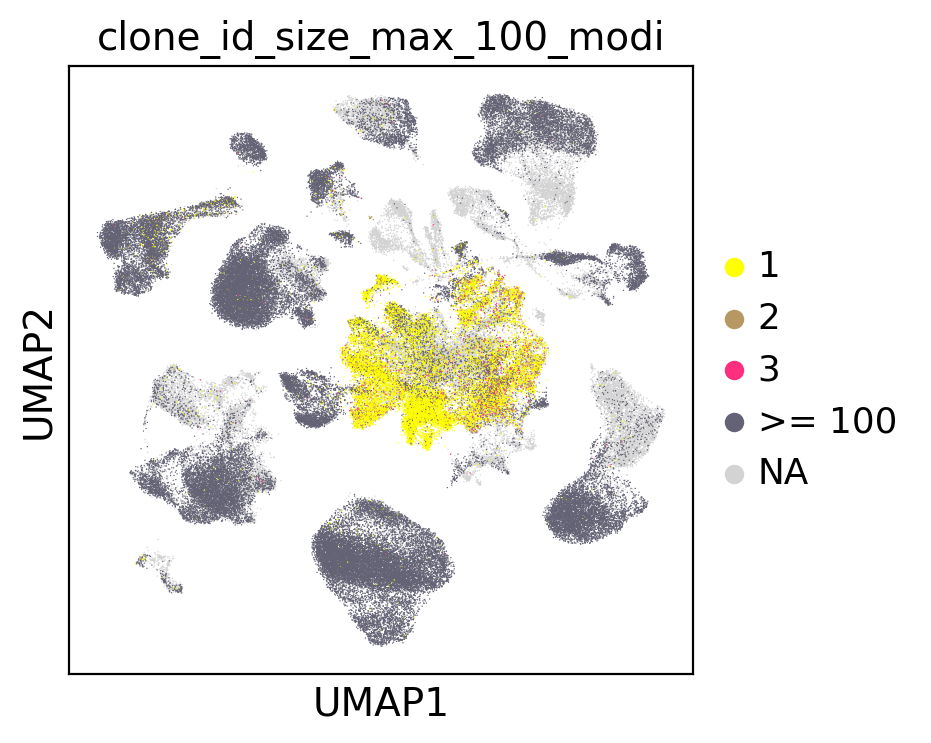

In [8]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.pl.umap(trab_adata, color='clone_id_size_max_100_modi', groups=['NA','1','2','3','>= 100'])

In [12]:
trab_adata.obs['clone_id'].value_counts()[1:10]

clone_id
abT_314_5_20_491_3_4                       8303
None                                       7884
abT_314_5_20                               5815
abT_303_6_1_660_2_2|abT_75_3_12_660_2_2    4268
abT_361_1_2_470_5_16                       3030
abT_356_7_7_185_1_1                        2410
abT_616_1_1                                2267
abT_361_1_2                                2266
abT_356_7_7                                1515
Name: count, dtype: int64

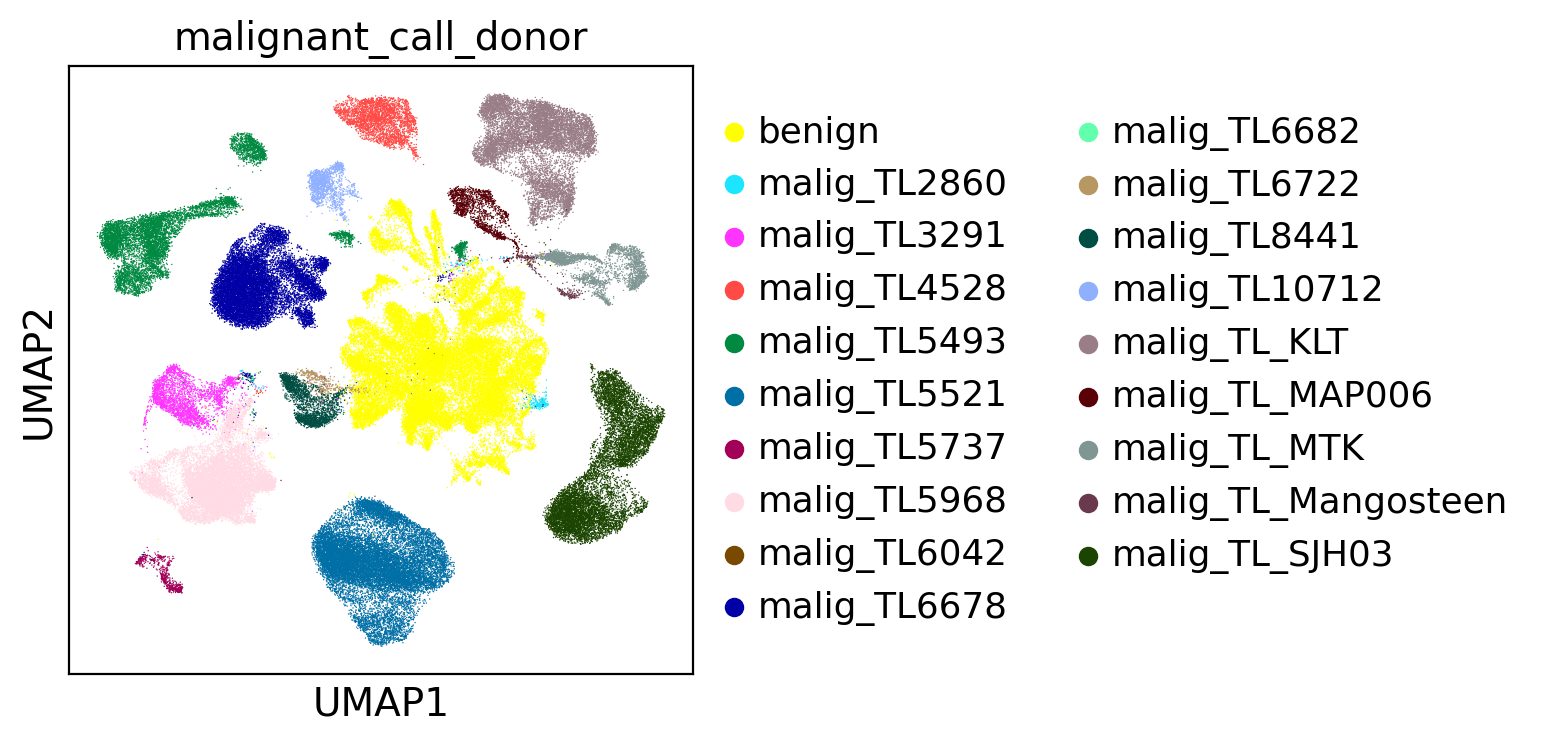

In [13]:
sc.pl.umap(trab_adata, color=['malignant_call_donor'])

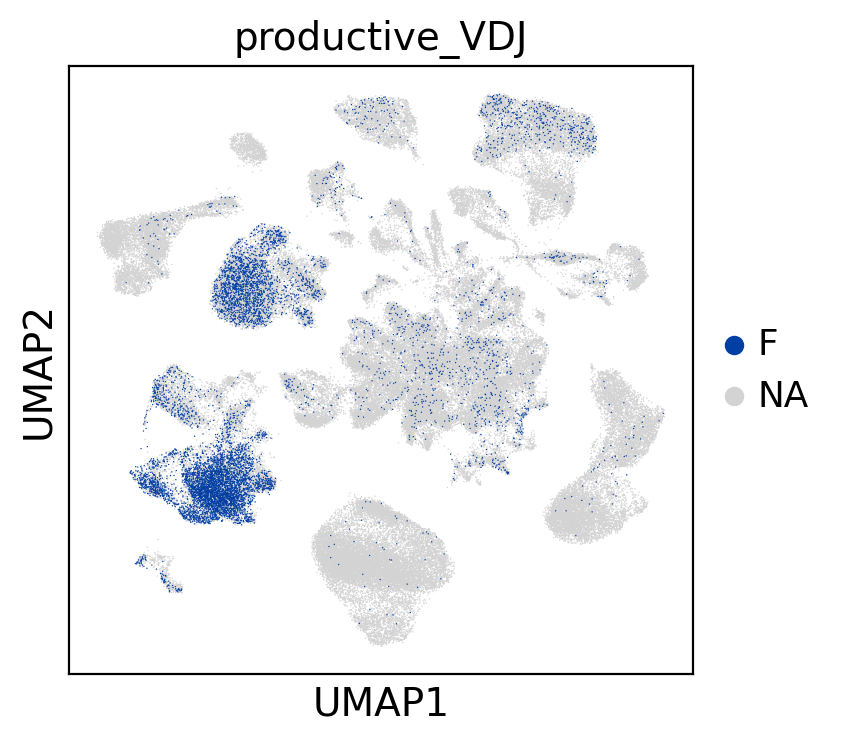

In [33]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.pl.umap(trab_adata, color=['productive_VDJ'],groups=['F'])